## Assignment 6
This assignment requires you to work with Facebook network data, data preprocessing and `networkx`. Note that this is real data from real people!
### Part 1: Preparing data

The dataset you will be working with is available here: https://snap.stanford.edu/data/egonets-Facebook.html

You're first job is to 
1. Download the data

In [1]:
from urllib import request as req

file_name = "facebook_combined.txt"
zip_file_name = f"{file_name}.gz"

req.urlretrieve(f"https://snap.stanford.edu/data/{zip_file_name}",f"./{zip_file_name}")

('./facebook_combined.txt.gz', <http.client.HTTPMessage at 0x111e196a0>)

2. Unpack the data

In [2]:
import gzip
import shutil

with gzip.open(zip_file_name, 'rb') as f_in:
    with open(file_name, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

3. Import the data as an undirected graph in `networkx`

This should **all be done from your notebook in Python**. This is an important step for you to automate data preprocessing. 

Note: this could take a while, so if you feel adventurous you can use the `multiprocessing` library to speed things up.

Hand-in:
* The code for downloading, unpacking and loading the dataset

In [3]:
with open(file_name) as file:
    edges = [edge.split() for edge in file]

In [4]:
import networkx as nx

graph = nx.Graph()
graph.clear()
graph.add_edges_from(edges)

## Part 2: Analyse the data

Now, let's take a look at the network you imported. 

By *node degree* we mean the *number of edges to and from a node*. This is different in an undirected network, where in-degree == out-degree, and a directed network where in-degree != out-degree.

By *graph degree* we mean the *number of edges in the entire network*.

Hand-in code that display:
* The number of nodes in the network

In [5]:
graph.number_of_nodes()

4039

* The number of edges in the network

In [6]:
graph.number_of_edges()

88234

* The average degree in the network

In [7]:
degrees = dict(graph.degree)
de_vals = degrees.values()
sum(de_vals) / len(de_vals)

43.69101262688784

* A visualisation of the network inside your notebook

In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

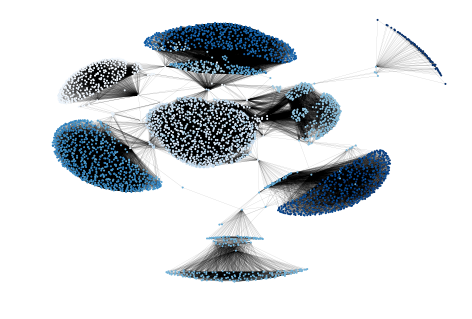

In [11]:
#This takes a lot of time! - be patient, have a coffee ;-)

#mybinder is aparently not able to install pygraphviz which is the "program" that generates the graph, so don't run this block
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=1, width=.05, cmap=plt.cm.Blues, 
            with_labels=False, node_color=range(len(graph)))

### Part 3: Find the most popular people

We're naturally interested in who has the most friends, so we want to extract **top 10**. That is, the 10 most connected people.

Hand-in:
* Code that extracts and reports the 10 people with the most connections in the network

In [9]:
sorted(degrees.items(), key=lambda kv: -kv[1])[0:10]

[('107', 1045),
 ('1684', 792),
 ('1912', 755),
 ('3437', 547),
 ('0', 347),
 ('2543', 294),
 ('2347', 291),
 ('1888', 254),
 ('1800', 245),
 ('1663', 235)]